## Exploring k-Nearest Neighbors with the Iris Dataset

This notebook is part of my assignment. I'm using the classic Iris dataset to understand how the k-Nearest Neighbors (k-NN) algorithm works — from data loading and visualization to model training and evaluation.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_iris

In [6]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
print(iris['DESCR'][:193] + "\n...")


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive 
...


In [9]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [12]:
type(iris['data'])

numpy.ndarray

- The dataset has 150 samples (rows), each with 4 features (columns).

- Each row represents one flower.

- Each column represents a measurement: sepal length, sepal width, petal length, petal width.

In [13]:
iris['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

- These are the feature values for the first five flowers.

- Each row is a sample, and each number is a feature value in centimeters.

In [15]:
iris['target'].shape

(150,)

In [16]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

- The meaning of the numbers are given by the iris['target_names'] array: 0 means
 Setosa, 1 means Versicolor and 2 means Virginica.

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test=train_test_split(iris['data'], iris['target'], random_state=0)

- train_test_split from sklearn.model_selection to divide the Iris dataset into training and test sets.
- Shuffling: Prevents the test set from containing only one class due to sorted labels.

- Reproducibility: random_state=0 ensures consistent results across runs.

- Data Split: 75% of the data is used for training (X_train, y_train), and 25% for testing (X_test, y_test).

In [19]:
X_train.shape

(112, 4)

In [20]:
X_test.shape

(38, 4)

In [21]:
y_train.shape

(112,)

In [22]:
y_test.shape

(38,)

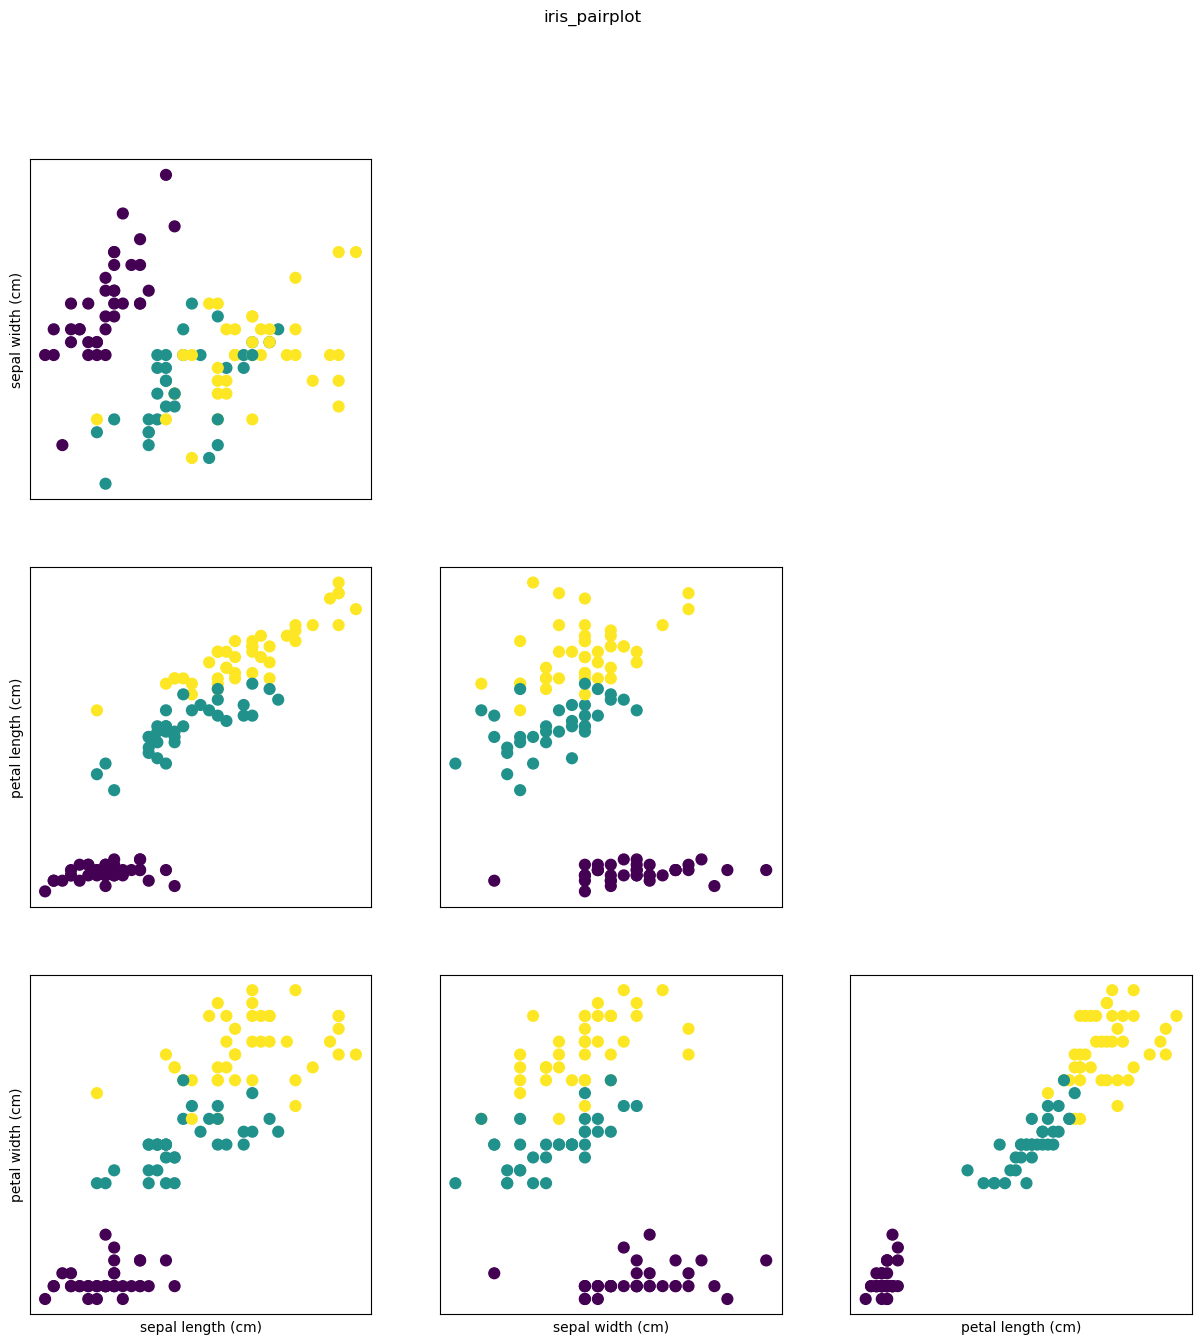

In [24]:
fig, ax=plt.subplots(3, 3, figsize=(15, 15))
plt.suptitle('iris_pairplot')  # Changed from ply.subtitle to plt.suptitle
for i in range(3):
    for j in range(3):
        ax[i, j].scatter(X_train[:, j], X_train[:, i + 1], c=y_train, s=60)
        ax[i, j].set_xticks(())
        ax[i, j].set_yticks(())
        
        # Set x-axis labels only on bottom row
        if i == 2:
            ax[i, j].set_xlabel(iris['feature_names'][j])
        
        # Set y-axis labels only on leftmost column
        if j == 0:
            ax[i, j].set_ylabel(iris['feature_names'][i + 1])
        
        # Hide upper triangle plots
        if j > i:
            ax[i, j].set_visible(False)

plt.show()

# Analysis of Iris Pairplot

"""
This customized pairplot visualizes relationships between key features of the Iris dataset:
- Sepal length, Sepal width
- Petal length, Petal width

Key observations:
1. **Petal length vs. Petal width** shows strong linear separation between species, making it a powerful feature pair for classification.
2. **Sepal features** (length vs. width) show more overlap between classes, especially between versicolor and virginica, indicating weaker discriminative power.
3. **Petal length vs. Sepal width** and **Petal width vs. Sepal width** reveal moderate separation, useful for supporting classification but not as decisive.
4. The color-coded points (purple, teal, yellow) represent the three species: setosa, versicolor, and virginica. Setosa is clearly separable in most plots.
5. The upper triangle of the grid is hidden to reduce redundancy and focus on unique feature combinations.

This visualization helps identify which feature pairs are most informative for distinguishing flower species, guiding feature selection for machine learning models.
"""


# Analysis: Training a k-Nearest Neighbors Classifier


I will now train a k-nearest neighbors (k-NN) classifier using scikit-learn.

- Instantiate the model with `n_neighbors=1`, meaning predictions will be based on the single closest training point.
- The model is trained using the `.fit()` method, which stores the training data internally.
- Unlike other algorithms, k-NN does not build a mathematical model — it simply memorizes the training set and uses distance-based lookup during prediction.

This approach is intuitive and effective for small datasets like Iris, where class boundaries are well-separated.



In [32]:
from sklearn.neighbors import KNeighborsClassifier

# Create a k-NN classifier with k=1
knn = KNeighborsClassifier(n_neighbors=1)

# Train the model using the training data
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=1)

Accuracy: 0.97
Confusion Matrix:
 [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


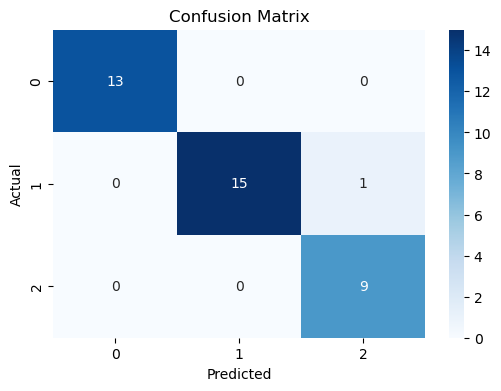

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# Make predictions
y_pred = knn.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Visualize confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
report = classification_report(y_test, y_pred, target_names=iris['target_names'])
print("Classification Report:\n", report)


# Analysis: Evaluating k-NN Classifier Performance

The model achieved accuracy of 97%, which means it correctly classified 37 out of 38 test samples.

Looking at the confusion matrix:
- Setosa was perfectly classified (13/13).
- Versicolor had one misclassification (15/16 correct).
- Virginica was also perfectly classified (9/9).

The classification report gives deeper insight:
- Precision and recall for Setosa are both 1.00 — flawless.
- Versicolor has slightly lower recall (0.94), meaning one sample was missed.
- Virginica has slightly lower precision (0.90), indicating one false positive.

Macro and weighted averages are both around 0.97–0.98, confirming balanced performance across all classes.




In [1]:
import os
print(os.getcwd())


C:\Users\knowl
